In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Setting default options
warnings.filterwarnings("ignore")
pd.set_option("mode.copy_on_write", True)

In [2]:
# loading the data
df = pd.read_csv("/Users/revanth/Downloads/ipums_06.csv")
df.sample(5)

,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,URBRRL,PERNUM,NHISPID,HHX,...,SMOKESTATUS3,CIGSDAYCSFS,CIGSDAYCSFS2,CIGSLONGFS,MORTSTAT,MORTDODY,MORTUCOD,MORTUCODLD,MORTWT,MORTWTSA
2483900,2015,7951,6255,1,2015011802,4400.0,NaN,2,20150118020102,11802,...,NaN,NaN,NaN,0.0,9.0,9999.0,NaN,96.0,NaN,0.0
1167772,2001,3417,5030,2,2001005732,2300.0,NaN,2,20010057320102,5732,...,0.0,NaN,NaN,NaN,9.0,9999.0,999.0,96.0,0.0,0.0
1456798,2004,4734,5160,1,2004007948,1461.0,NaN,4,20040079480104,7948,...,NaN,NaN,NaN,NaN,9.0,9999.0,999.0,96.0,0.0,0.0
1956334,2010,1483,6133,1,2010002311,2293.0,NaN,1,20100023110101,2311,...,NaN,NaN,NaN,0.0,2.0,9999.0,NaN,96.0,4063.0,4807.0
1956449,2010,1538,6252,1,2010002392,1144.0,NaN,3,20100023920103,2392,...,NaN,NaN,NaN,0.0,9.0,9999.0,NaN,96.0,0.0,0.0


In [3]:
# printing the columns
print(df.columns)

Index(['YEAR', 'SERIAL', 'STRATA', 'PSU', 'NHISHID', 'HHWEIGHT', 'URBRRL',
       'PERNUM', 'NHISPID', 'HHX', 'FMX', 'PX', 'PERWEIGHT', 'SAMPWEIGHT',
       'LONGWEIGHT', 'PARTWEIGHT', 'FWEIGHT', 'SUPP2WT', 'ASTATFLG',
       'CSTATFLG', 'AGE', 'SEX', 'BIRTHYR', 'RACENEW', 'OCC', 'POORYN',
       'INCFAM97ON2', 'INCFAM07ON', 'FAMTOTINC', 'EARNIMP1', 'HINOTCOVE',
       'HICOVSTAT', 'HIOTHGOVYR', 'HINOLAPYMO', 'HINOLASTCOV', 'HINOUNEMPR',
       'HINOEMPR', 'HINOFAMR', 'HINOAGER', 'HINOCOSTR', 'HINOREFUSER',
       'HINOTHER', 'HINOWANT', 'HINOELIG', 'HINOCONF', 'HINOMEET', 'HINOWAIT',
       'HINOMISS', 'HISTOP1', 'HISTOP3', 'HISTOP4', 'HISTOP8', 'HISTOP11',
       'HISTOP12', 'HISTOP13', 'HISTOP14', 'HISTOP15', 'HISTOP16', 'HISTOP17',
       'HISTOP18', 'HISTOP19', 'HISTOP20', 'HISTOP22', 'HISTOP23', 'HISTOP24',
       'HISTOP25', 'HIBUYNOCOND', 'HIBUYNOCOST', 'HIBUYNODENY', 'HIBUYNOSORC',
       'HIBUYNOOTHR', 'HISTOP5A', 'CNLUNG', 'CNLUNGAG', 'CANHICHANGE',
       'SMOKEV', 'CIGDAYM

The columns related to not having health insurance are:

- HINOTCOVE (Health Insurance coverage status)
- HICOVSTAT (Health insurance coverage status)
- HIOTHGOVYR (Had other government program coverage in the past 12 months )
- HINOLAPYMO (Months without any health insurance, past 12 months, covered at time of survey)
- HINOLASTCOV (When last covered by health insurance)
- HINOUNEMPR (Reasons for no insurance: Unemployment)
- HINOEMPR (Reasons for no insurance: Employment-related reason)
- HINOFAMR (Reasons for no insurance: Family-related)
- HINOAGER (Reasons for no insurance: Aged out of family plan)
- HINOCOSTR (Reasons for no insurance: Too expensive)
- HINOREFUSER (Reasons for no insurance: Poor health/refused coverage)
- HINOTHER (Reasons for no insurance: Other)
- HINOWANT (Reasons for no insurance: Do not want or need coverage)
- HINOELIG (Reasons for no insurance: Not eligible)
- HINOCONF (Reasons for no insurance: Too difficult or confusing)
- HINOMEET (Reasons for no insurance: Plans don't meet needs)
- HINOWAIT (Reasons for no insurance: Coverage has not started yet)
- HINOMISS (Reasons for no insurance: Missed Deadline)

In [4]:
# including only the relevant columns
required_columns = [
    "HINOTCOVE",
    "HINOUNEMPR",
    "HINOEMPR",
    "HINOFAMR",
    "HINOAGER",
    "HINOCOSTR",
    "HINOREFUSER",
    "HINOTHER",
    "HINOWANT",
    "HINOELIG",
    "HINOCONF",
    "HINOMEET",
    "HINOWAIT",
    "HINOMISS",
]

In [5]:
# subsetting for the required columns
df_analysis = df[required_columns]
df_analysis.sample(5)

,HINOTCOVE,HINOUNEMPR,HINOEMPR,HINOFAMR,HINOAGER,HINOCOSTR,HINOREFUSER,HINOTHER,HINOWANT,HINOELIG,HINOCONF,HINOMEET,HINOWAIT,HINOMISS
1449566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2960819,1.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2617448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
919516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking the proportion of missing values by column
df_analysis.isna().sum() / df_analysis.shape[0] * 100

HINOTCOVE      25.554928
HINOUNEMPR     12.379842
HINOEMPR       17.472235
HINOFAMR       17.472235
HINOAGER       17.472235
HINOCOSTR      12.379842
HINOREFUSER    17.472235
HINOTHER       12.379842
HINOWANT       94.907607
HINOELIG       94.907607
HINOCONF       94.907607
HINOMEET       94.907607
HINOWAIT       94.907607
HINOMISS       94.907607
dtype: float64

The columns towards the end of the list have a lot of missing values, so we will just consider the first few columns after subsetting for the people who explicitly said they do not have health insurance. Then if they have not answered "yes" explicitly under any of the first few problems, we will consider them as "other" reasons for not having health insurance.

In [7]:
# filtering only the rows for people wihout health insurance
df_analysis = df_analysis[df_analysis["HINOTCOVE"] == 2]

In [8]:
# rechecking the proportion of missing values by column
df_analysis.isna().sum() / df_analysis.shape[0] * 100

HINOTCOVE       0.000000
HINOUNEMPR      0.000000
HINOEMPR        3.396505
HINOFAMR        3.396505
HINOAGER        3.396505
HINOCOSTR       0.000000
HINOREFUSER     3.396505
HINOTHER        0.000000
HINOWANT       96.603495
HINOELIG       96.603495
HINOCONF       96.603495
HINOMEET       96.603495
HINOWAIT       96.603495
HINOMISS       96.603495
dtype: float64

In [9]:
# columns which have relatively low missing values
level_2 = [
    "HINOUNEMPR",
    "HINOEMPR",
    "HINOFAMR",
    "HINOAGER",
    "HINOCOSTR",
    "HINOREFUSER",
]

In [10]:
# subsetting only the columns selected above
df_ana_2 = df_analysis[level_2]
df_ana_2.sample(5)

,HINOUNEMPR,HINOEMPR,HINOFAMR,HINOAGER,HINOCOSTR,HINOREFUSER
2558808,1.0,1.0,1.0,1.0,2.0,1.0
1825371,1.0,1.0,1.0,1.0,1.0,1.0
1821858,1.0,1.0,1.0,1.0,1.0,1.0
2490936,1.0,2.0,1.0,1.0,2.0,1.0
2185910,2.0,1.0,1.0,1.0,1.0,1.0


for all these columns, 2 is the value for explicitly saying "yes" so we will recode the columns to consider 2 as 1 and all other values as 0.

In [11]:
# value of 2 is the actual value
def corrector(x):
    if x == 2:
        return 1
    else:
        return 0

In [12]:
# applying the function to the columns
for col in level_2:
    df_ana_2[col] = df_ana_2[col].apply(corrector)

after the recoding we are checking each row to see if the person has answered "yes" (1) under any of the columns and if not we are considering them as "other" reasons for not having health insurance.

In [13]:
def row_other(row):
    if row.sum() >= 1:
        return 0
    else:
        return 1

In [14]:
# applying the function to the rows
df_ana_2["OTHER"] = df_ana_2.apply(row_other, axis=1)
df_ana_2.sample(5)

,HINOUNEMPR,HINOEMPR,HINOFAMR,HINOAGER,HINOCOSTR,HINOREFUSER,OTHER
2150036,0,0,0,0,1,0,0
1797962,0,0,0,0,0,0,1
1519453,1,0,0,0,0,0,0
2212929,1,0,0,0,0,0,0
1404334,0,0,0,0,0,0,1


In [15]:
total_rows = df_ana_2.shape[0]
# calcuating the proportions
for col in df_ana_2.columns:
    print(f"{col}:{ df_ana_2[col].sum() / total_rows:.2f}")

HINOUNEMPR:0.21
HINOEMPR:0.11
HINOFAMR:0.08
HINOAGER:0.06
HINOCOSTR:0.44
HINOREFUSER:0.01
OTHER:0.27


In [16]:
# renaming the columns for better understanding
remap = {
    "HINOUNEMPR": "Unemployment",
    "HINOEMPR": "Employment Related",
    "HINOFAMR": "Family Related",
    "HINOAGER": "Age",
    "HINOCOSTR": "Cost",
    "HINOREFUSER": "Refused",
    "OTHER": "Other",
}
df_ana_2.rename(columns=remap, inplace=True)
df_ana_2.sample(5)

,Unemployment,Employment Related,Family Related,Age,Cost,Refused,Other
2220830,0,0,0,0,0,0,1
1605957,0,1,0,0,0,0,0
2899781,0,0,0,0,1,0,0
851665,0,0,0,0,0,0,1
2969961,0,0,0,0,0,0,1


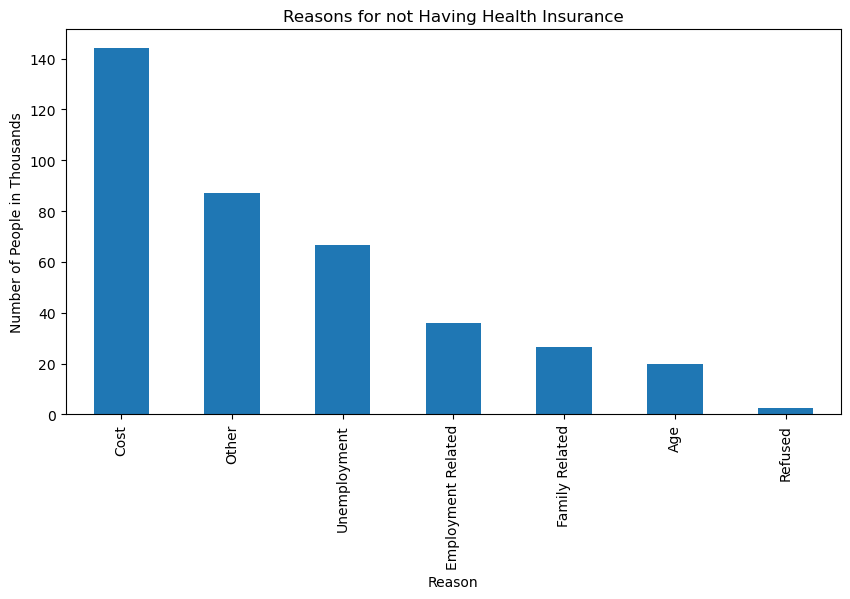

In [17]:
# plotting the data
plt.figure(figsize=(10, 5))
(df_ana_2.sum().sort_values(ascending=False) / 1000).plot(kind="bar")
plt.title("Reasons for not Having Health Insurance")
plt.ylabel("Number of People in Thousands")
plt.xlabel("Reason")
plt.show()

Note: we are not using proportion since some people have answered "yes" under mutiple categories, so the proportion will be more than 1. hence we are just sticking with the count of people who have answered "yes" under any of the categories since our goal is to see the relative importance of each category and not the actual values